In [1]:
#importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data

dataf = pd.read_csv('C:/Users/Neha Verma/Documents/final project/mental health dataset/mental-heath-in-tech-2016_20161114.csv')


In [3]:
# Renaming the features
renamed_features = ['self_employed', 'company_employee_total',  'tech_company', 'tech_IT_role', 'mentalhealth_coverage',
                    'mentalhealth_coverage_awareness', 'mentalhealth_employer_discussion', 'mentalhealth_resources_provided', 'mentalhealth_anonimity_protection',
                    'mentalhealth_medical_leave_issue', 'mentalhealth_discussion_negative_impact', 'physicalhealth_discussion_negative_impact', 'mentalhealth_discussion_coworkers', 
                    'mentalhealth_discussion_directsupervisor', 'mentalhealth_seriousness_employer', 'mentalhealth_negative_consequences_coworkers', 'mentalhealth_coverage',
                    'mentalhealth_local_online_resources','mentalhealth_diagnosed_revealed_client','mentalhealth_diagnosed_revealed_client_impact','mentalhealth_diagnosed_reveal_coworker',
                    'mentalhealth_coworker_reveal_negative_impact','mentalhealth_productivity_impact','mentalhealth_productivity_impact_percentage','previous_employer','previous_mentalhealth_benefits'
                    ,'previous_mentalhealth_benefits_awareness','previous_mentalhealth_discussion','previous_mentalhealth_resources','previous_mentalhealth_anonimity','previous_mentalhealth_discussion_negative_consequences'
                    ,'previous_physicalhealth_discussion_negative_consequences','previous_mentalhealth_discussion_coworker','previous_mentalhealth_discussion_directsupervisor','previous_mentalhealth_importance'
                    ,'previous_mentalhealth_consequences_coworkers','physicalhealth_issue_futureinterview','why/why not','mental_issue_futureinterview','why/why not','mentalhealth_issue_future_career','mentalhealth_response_teammember'
                    ,'mentalhealth_share_friends/family','mentalhealth_bad_response','mentalhealth_reveal_others_discussion','mentalhealth_family_history','mentalhealth_disorder_past','mentalhealth_disorder_current','yes_diagnosis'
                    ,'maybe_diagnosis','mentalhealth_diagnosed_professional','yes_diagnosis_professional','mentalhealth_treatment_professional','mentalhealth_issue_interfere_work','mentalhealth_issue_interfere_work_not_treated'
                    ,'age','gender','country','US_STATE','country_work','US_STATE_work','work_position','work_remote']
dataf.columns = renamed_features
dataf.head()

,self_employed,company_employee_total,tech_company,tech_IT_role,mentalhealth_coverage,mentalhealth_coverage_awareness,mentalhealth_employer_discussion,mentalhealth_resources_provided,mentalhealth_anonimity_protection,mentalhealth_medical_leave_issue,...,mentalhealth_issue_interfere_work,mentalhealth_issue_interfere_work_not_treated,age,gender,country,US_STATE,country_work,US_STATE_work,work_position,work_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
# pre process the gender feature

dataf['gender'] = dataf['gender'].replace('nan', np.nan)
dataf['gender'] = dataf['gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE','Male'],value=0)

dataf['gender'] = dataf['gender'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Female','Cis female '],value=1)

dataf['gender'] = dataf['gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'],value=2)

In [5]:
# pre process the compnay size

import numpy as np

def preprocess_company_size(size):
    if pd.isnull(size):  # Handle missing values
        return np.nan
    elif 'More than' in size:  # Handle 'More than' values
        return 10000  # Replace 'More than' with a large number
    else:
        # Extract lower and upper bounds of the range
        lower, upper = map(int, size.split('-'))
        # Compute the average of the range and return
        return (lower + upper) / 2

# Apply the preprocessing function to the column 'company_employee_total'
dataf['company_employee_total'] = dataf['company_employee_total'].apply(preprocess_company_size).astype(float)

dataf['company_employee_total'].unique()

array([6.30e+01, 1.55e+01,      nan, 1.00e+04, 3.00e+02, 7.50e+02,
       3.00e+00])

## cnn xgbosst ensemble

148/148 [==============================] - 2s 14ms/step - loss: 0.4877 - accuracy: 0.8277 - val_loss: 0.0031 - val_accuracy: 1.0000
Average Epoch Duration: 1.9209431409835815
148/148 [==============================] - 2s 13ms/step - loss: 0.4769 - accuracy: 0.8347 - val_loss: 0.0019 - val_accuracy: 1.0000
Average Epoch Duration: 1.7750277757644652
148/148 [==============================] - 2s 11ms/step - loss: 0.5214 - accuracy: 0.8230 - val_loss: 0.0068 - val_accuracy: 1.0000
Average Epoch Duration: 1.9870372772216798
148/148 [==============================] - 2s 11ms/step - loss: 0.4940 - accuracy: 0.8307 - val_loss: 0.0047 - val_accuracy: 1.0000
Average Epoch Duration: 1.9387983083724976
148/148 [==============================] - 2s 12ms/step - loss: 0.4980 - accuracy: 0.8339 - val_loss: 0.0037 - val_accuracy: 1.0000
Average Epoch Duration: 2.1650330066680907
9/9 [==============================] - 0s 6ms/step - loss: 2.0384 - accuracy: 0.5210
Combined Model Accuracy: 0.6985283009673

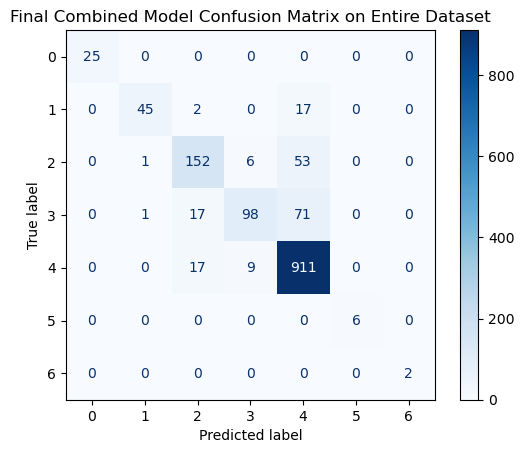

In [6]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import time

# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)


# Define the resampling strategy
resampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)

# Initialize StratifiedKFold for cross-validation
n_splits = 5  # You can change the number of splits as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store scores
cnn_scores = []
xgb_scores = []
combined_scores = []

# Perform k-fold cross-validation with data augmentation and resampling
for train_index, test_index in stratified_kfold.split(X, y_encoded):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Apply resampling to the training data
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    # Reshape X_train and X_test for the CNN model
    X_train_cnn = X_train_scaled[:, :, np.newaxis]
    X_test_cnn = X_test_scaled[:, :, np.newaxis]

    # Build and compile the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Initialize a list to store epoch durations
    epoch_durations = []

    # Train the CNN model
    for epoch in range(10):  # Adjust the number of epochs as needed
        start_time = time.time()

        # Train the model for one epoch
        cnn_model.fit(X_train_cnn, to_categorical(y_train_resampled, num_classes=len(mlb.classes_)), epochs=1, batch_size=32, validation_split=0.1)

        end_time = time.time()
        epoch_duration = end_time - start_time
        epoch_durations.append(epoch_duration)

    # Calculate the average epoch duration
    average_epoch_duration = np.mean(epoch_durations)
    print("Average Epoch Duration:", average_epoch_duration)

    # Predict using the CNN model
    y_pred_cnn_onehot = cnn_model.predict(X_test_cnn)
    y_pred_cnn = np.argmax(y_pred_cnn_onehot, axis=1)
    
    # Build and train the XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
    multi_xgb_model = MultiOutputClassifier(xgb_model)
    multi_xgb_model.fit(X_train_scaled, to_categorical(y_train_resampled, num_classes=len(mlb.classes_)))

    # Predict using the XGBoost model
    y_pred_xgb = multi_xgb_model.predict(X_test_scaled)
    
    # Combine CNN predictions and XGBoost predictions
    combined_predictions = np.concatenate((y_pred_cnn.reshape(-1, 1), y_pred_xgb), axis=1)

    # Build a new model (e.g., a Gradient Boosting Classifier) to combine the predictions
    combined_model = GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
    combined_model.fit(combined_predictions, y_test)
    
    # Evaluate the models
    cnn_scores.append(cnn_model.evaluate(X_test_cnn, to_categorical(y_test, num_classes=len(mlb.classes_)))[1])
    xgb_scores.append(multi_xgb_model.score(X_test_scaled, to_categorical(y_test, num_classes=len(mlb.classes_))))
    combined_scores.append(combined_model.score(combined_predictions, y_test))

print("Combined Model Accuracy:", np.mean(combined_scores))




# Train the final combined model on the entire dataset
final_combined_model = GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
final_combined_model.fit(X, y_encoded)  # Train on the entire feature matrix X

# Predict using the final combined model
final_combined_predictions = final_combined_model.predict(X)  # Predict using the entire feature matrix X

# Calculate and print accuracy on the entire dataset
final_combined_accuracy = accuracy_score(y_encoded, final_combined_predictions)
print("Accuracy on Entire Dataset (Final Combined Model):", final_combined_accuracy)

# Plot the confusion matrix for the final combined model on the entire dataset
unique_labels = np.unique(y_encoded)
plot_confusion_matrix(final_combined_model, X, y_encoded, display_labels=unique_labels, cmap=plt.cm.Blues)
plt.title("Final Combined Model Confusion Matrix on Entire Dataset")
plt.show()



Precision on Entire Dataset (Final Combined Model): 0.864809030225493
Recall on Entire Dataset (Final Combined Model): 0.8646196789951152
F1-Score on Entire Dataset (Final Combined Model): 0.8559058116826682


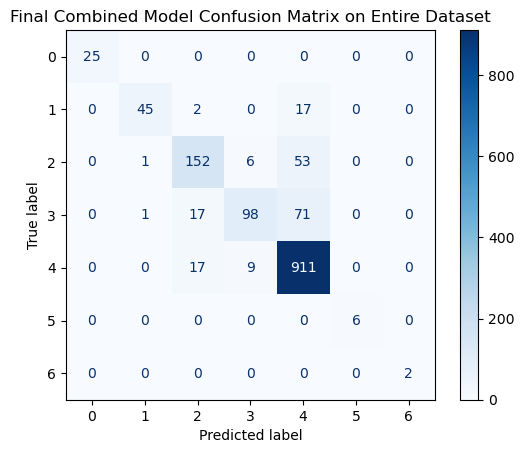

In [7]:
# ... (Previous code)

from sklearn.metrics import precision_score, recall_score, f1_score

# ... (Previous code)

# Calculate precision, recall, and F1-score on the entire dataset
final_combined_precision = precision_score(y_encoded, final_combined_predictions, average='weighted')
final_combined_recall = recall_score(y_encoded, final_combined_predictions, average='weighted')
final_combined_f1 = f1_score(y_encoded, final_combined_predictions, average='weighted')

print("Precision on Entire Dataset (Final Combined Model):", final_combined_precision)
print("Recall on Entire Dataset (Final Combined Model):", final_combined_recall)
print("F1-Score on Entire Dataset (Final Combined Model):", final_combined_f1)

# Plot the confusion matrix for the final combined model on the entire dataset
unique_labels = np.unique(y_encoded)
plot_confusion_matrix(final_combined_model, X, y_encoded, display_labels=unique_labels, cmap=plt.cm.Blues)
plt.title("Final Combined Model Confusion Matrix on Entire Dataset")
plt.show()


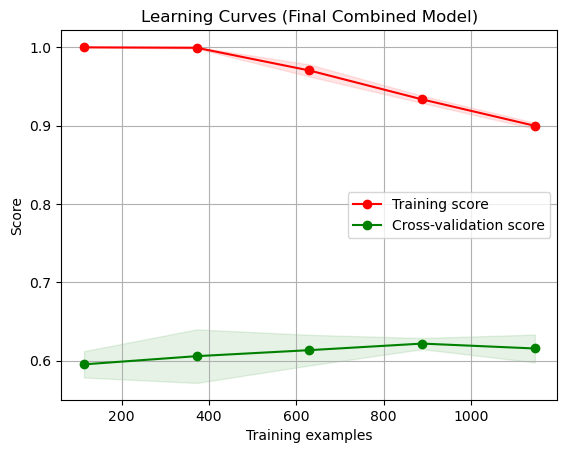

In [8]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# ... (Previous code remains the same)

# Define the title for the learning curve plot
title = "Learning Curves (Final Combined Model)"

# Specify the classifier (final_combined_model) and dataset (X and y_encoded)
plot_learning_curve(final_combined_model, title, X, y_encoded, cv=stratified_kfold)
plt.show()


## CNN xgboost

In [36]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from keras.utils import to_categorical
import time


# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)


# Initialize StratifiedKFold for cross-validation
n_splits = 5  # You can change the number of splits as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores
xgb_accuracies = []

# Perform cross-validation
for train_index, val_index in stratified_kfold.split(X, y_encoded):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Reshape X_train and X_val for the CNN model
    X_train_cnn = X_train_scaled[:, :, np.newaxis]
    X_val_cnn = X_val_scaled[:, :, np.newaxis]

    # Build and train the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Lists to store epoch durations
    epoch_durations = []

    # Train the CNN model
    for epoch in range(20):  # Adjust the number of epochs as needed
        start_time = time.time()

        # Train the model for one epoch
        cnn_model.fit(X_train_cnn, to_categorical(y_train, num_classes=len(mlb.classes_)), epochs=1, batch_size=32, validation_split=0.1)

        end_time = time.time()
        epoch_duration = end_time - start_time
        epoch_durations.append(epoch_duration)

        print("Epoch", epoch + 1, "Duration:", epoch_duration)

    # Calculate the average epoch duration
    average_epoch_duration = np.mean(epoch_durations)
    print("Average Epoch Duration:", average_epoch_duration)

    # ... (Rest of the code for XGBoost and evaluation remains the same)
     # Extract features using the trained CNN model
    X_train_cnn_features = cnn_model.predict(X_train_cnn)
    X_val_cnn_features = cnn_model.predict(X_val_cnn)

    # Train the XGBoost model on CNN features
    xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train_cnn_features, y_train)



    # Predict using the XGBoost model
    y_pred_xgb = xgb_model.predict(X_val_cnn_features)

    # Evaluate the XGBoost model
    accuracy = accuracy_score(y_pred_xgb, y_val)
    xgb_accuracies.append(accuracy)
    
# Calculate and print mean accuracy across cross-validation folds
mean_accuracy = np.mean(xgb_accuracies)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

# Train the combined model on the entire dataset
combined_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
combined_model.fit(X, y_encoded)  # Fit on the entire dataset

# Predict using the combined model
combined_predictions = combined_model.predict(X)

# Generate classification report for the combined model
combined_classification_report = classification_report(
    y_encoded, combined_predictions, target_names=mlb.classes_, output_dict=True
)

# Print the classification report
#print("Classification Report for Combined Model:")
#print(combined_classification_report)

# Calculate and print accuracy on the entire dataset
accuracy_on_entire_dataset = accuracy_score(y_encoded, combined_predictions)
print("Accuracy on Entire Dataset:", accuracy_on_entire_dataset)





33/33 [==============================] - 1s 18ms/step - loss: 1.1359 - accuracy: 0.6402 - val_loss: 1.3662 - val_accuracy: 0.5130
Epoch 1 Duration: 1.1652522087097168
33/33 [==============================] - 0s 13ms/step - loss: 0.8246 - accuracy: 0.7003 - val_loss: 1.3292 - val_accuracy: 0.5130
Epoch 2 Duration: 0.5228550434112549
33/33 [==============================] - 0s 13ms/step - loss: 0.7174 - accuracy: 0.7168 - val_loss: 1.3641 - val_accuracy: 0.4870
Epoch 3 Duration: 0.5085413455963135
33/33 [==============================] - 0s 13ms/step - loss: 0.6628 - accuracy: 0.7304 - val_loss: 1.4993 - val_accuracy: 0.4783
Epoch 4 Duration: 0.5124416351318359
33/33 [==============================] - 1s 18ms/step - loss: 0.6296 - accuracy: 0.7391 - val_loss: 1.6240 - val_accuracy: 0.5043
Epoch 5 Duration: 0.6807026863098145
33/33 [==============================] - 1s 18ms/step - loss: 0.6119 - accuracy: 0.7313 - val_loss: 1.5847 - val_accuracy: 0.5043
Epoch 6 Duration: 0.705002784729003

33/33 [==============================] - 1s 19ms/step - loss: 0.5299 - accuracy: 0.7810 - val_loss: 2.1622 - val_accuracy: 0.5043
Epoch 15 Duration: 0.7291393280029297
33/33 [==============================] - 1s 20ms/step - loss: 0.5279 - accuracy: 0.7752 - val_loss: 2.1945 - val_accuracy: 0.4957
Epoch 16 Duration: 0.7503440380096436
33/33 [==============================] - 1s 20ms/step - loss: 0.5253 - accuracy: 0.7829 - val_loss: 2.1896 - val_accuracy: 0.5130
Epoch 17 Duration: 0.7532007694244385
33/33 [==============================] - 1s 20ms/step - loss: 0.5277 - accuracy: 0.7839 - val_loss: 2.2324 - val_accuracy: 0.4957
Epoch 18 Duration: 0.7695844173431396
33/33 [==============================] - 1s 20ms/step - loss: 0.5331 - accuracy: 0.7684 - val_loss: 2.2711 - val_accuracy: 0.5217
Epoch 19 Duration: 0.7473716735839844
33/33 [==============================] - 1s 20ms/step - loss: 0.5192 - accuracy: 0.7800 - val_loss: 2.2799 - val_accuracy: 0.5304
Epoch 20 Duration: 0.743569612

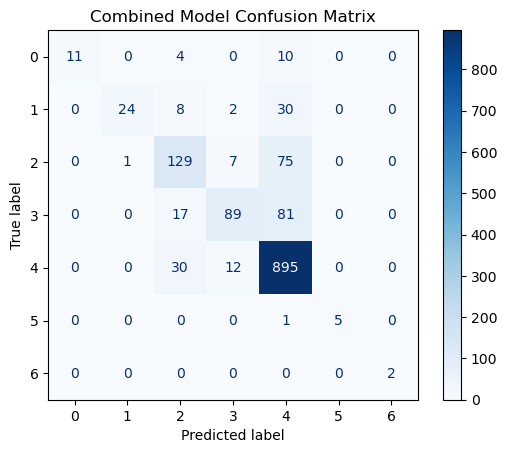

In [37]:
# Plot the confusion matrix for the combined model
plot_confusion_matrix(combined_model, X, y_encoded, cmap=plt.cm.Blues)
plt.title("Combined Model Confusion Matrix")
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for the combined model
precision_scores = precision_score(y_encoded, combined_predictions, average=None)
recall_scores = recall_score(y_encoded, combined_predictions, average=None)
f1_scores = f1_score(y_encoded, combined_predictions, average=None)

# Calculate accuracy
accuracy = accuracy_score(y_encoded, combined_predictions)



# Print the weighted average precision, recall, and F1-score
print("Weighted Average Metrics:")
print(f"Weighted Avg Precision: {precision_score(y_encoded, combined_predictions, average='weighted'):.4f}")
print(f"Weighted Avg Recall: {recall_score(y_encoded, combined_predictions, average='weighted'):.4f}")
print(f"Weighted Avg F1-score: {f1_score(y_encoded, combined_predictions, average='weighted'):.4f}")

# Print accuracy
print(f"Accuracy: {accuracy:.4f}")


Weighted Average Metrics:
Weighted Avg Precision: 0.8089
Weighted Avg Recall: 0.8060
Weighted Avg F1-score: 0.7904
Accuracy: 0.8060


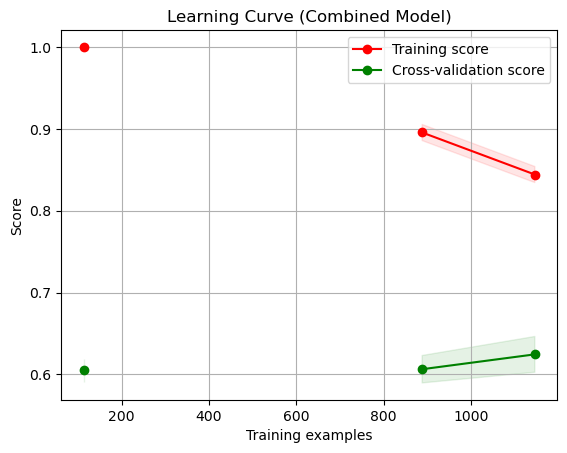

In [11]:
from sklearn.model_selection import learning_curve

# Define the title for the learning curve plot
learning_curve_title = "Learning Curve (Combined Model)"

# Create a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# ... (Previous code remains the same)

# Specify the classifier (combined_model) and dataset (X and y_encoded)
plot_learning_curve(combined_model, learning_curve_title, X, y_encoded, cv=stratified_kfold)
plt.show()


## CNN

In [39]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import time

# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)



# Initialize StratifiedKFold for cross-validation
n_splits = 5  # You can change the number of splits as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)



# Lists to store accuracy scores and epoch durations
cnn_accuracies = []
epoch_durations = []

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Perform cross-validation
for train_index, val_index in stratified_kfold.split(X, y_encoded):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Reshape X_train and X_val for the CNN model
    X_train_cnn = X_train_scaled[:, :, np.newaxis]
    X_val_cnn = X_val_scaled[:, :, np.newaxis]

    # Build and train the CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    for epoch in range(20):  # Adjust the number of epochs as needed
        start_time = time.time()

        # Train the model for one epoch
        cnn_model.fit(X_train_cnn, to_categorical(y_train, num_classes=len(mlb.classes_)), epochs=1, batch_size=32, validation_split=0.1)

        end_time = time.time()
        epoch_duration = end_time - start_time
        epoch_durations.append(epoch_duration)

        print("Epoch", epoch + 1, "Duration:", epoch_duration)

    # Evaluate the CNN model
    cnn_loss, cnn_accuracy = cnn_model.evaluate(X_val_cnn, to_categorical(y_val, num_classes=len(mlb.classes_)))
    cnn_accuracies.append(cnn_accuracy)
    
    # Predict using the trained CNN model
    y_pred_prob = cnn_model.predict(X_val_cnn)
    y_pred_cnn = np.argmax(y_pred_prob, axis=1)  # Get the index of the maximum probability for each instance
    
    # Append true and predicted labels to lists
    true_labels.extend(y_val)
    predicted_labels.extend(y_pred_cnn)

# Calculate and print mean accuracy across cross-validation folds
mean_cnn_accuracy = np.mean(cnn_accuracies)
print("Mean CNN Cross-Validation Accuracy:", mean_cnn_accuracy)

# Train the CNN model on the entire dataset
cnn_model.fit(X_train_cnn, to_categorical(y_encoded, num_classes=len(mlb.classes_)), epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the CNN model on the entire dataset
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_val_cnn, to_categorical(y_val, num_classes=len(mlb.classes_)))
print("CNN Model Accuracy on Test Set:", cnn_accuracy)

# Calculate accuracy on the entire dataset
accuracy_on_entire_dataset = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Entire Dataset:", accuracy_on_entire_dataset)






33/33 [==============================] - 1s 19ms/step - loss: 1.1300 - accuracy: 0.6314 - val_loss: 1.3052 - val_accuracy: 0.5217
Epoch 1 Duration: 1.170060396194458
33/33 [==============================] - 0s 14ms/step - loss: 0.8316 - accuracy: 0.6760 - val_loss: 1.3416 - val_accuracy: 0.5130
Epoch 2 Duration: 0.5344607830047607
33/33 [==============================] - 0s 14ms/step - loss: 0.7185 - accuracy: 0.7177 - val_loss: 1.3563 - val_accuracy: 0.5130
Epoch 3 Duration: 0.5373964309692383
33/33 [==============================] - 0s 14ms/step - loss: 0.6634 - accuracy: 0.7352 - val_loss: 1.4403 - val_accuracy: 0.5304
Epoch 4 Duration: 0.5450341701507568
33/33 [==============================] - 1s 20ms/step - loss: 0.6324 - accuracy: 0.7420 - val_loss: 1.5340 - val_accuracy: 0.4957
Epoch 5 Duration: 0.7217221260070801
33/33 [==============================] - 1s 19ms/step - loss: 0.6155 - accuracy: 0.7381 - val_loss: 1.6163 - val_accuracy: 0.4957
Epoch 6 Duration: 0.7314651012420654

33/33 [==============================] - 1s 19ms/step - loss: 0.5323 - accuracy: 0.7703 - val_loss: 2.0608 - val_accuracy: 0.5043
Epoch 15 Duration: 0.7361719608306885
33/33 [==============================] - 1s 18ms/step - loss: 0.5345 - accuracy: 0.7820 - val_loss: 2.1227 - val_accuracy: 0.4696
Epoch 16 Duration: 0.6893320083618164
33/33 [==============================] - 1s 19ms/step - loss: 0.5347 - accuracy: 0.7859 - val_loss: 2.1274 - val_accuracy: 0.5130
Epoch 17 Duration: 0.7404794692993164
33/33 [==============================] - 1s 19ms/step - loss: 0.5251 - accuracy: 0.7752 - val_loss: 2.0943 - val_accuracy: 0.5304
Epoch 18 Duration: 0.7117519378662109
33/33 [==============================] - 1s 20ms/step - loss: 0.5304 - accuracy: 0.7742 - val_loss: 2.1195 - val_accuracy: 0.5043
Epoch 19 Duration: 0.7514312267303467
33/33 [==============================] - 1s 19ms/step - loss: 0.5332 - accuracy: 0.7810 - val_loss: 2.1307 - val_accuracy: 0.5217
Epoch 20 Duration: 0.724029779

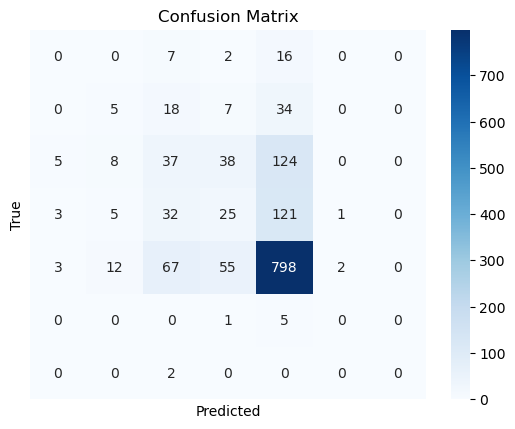

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix without labels
#plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=False, yticklabels=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate and print precision, recall, and F1-score on the entire dataset
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision on Entire Dataset:", precision)
print("Recall on Entire Dataset:", recall)
print("F1-score on Entire Dataset:", f1)

Precision on Entire Dataset: 0.5417319431901054
Recall on Entire Dataset: 0.6036287508722958
F1-score on Entire Dataset: 0.5674749229960585


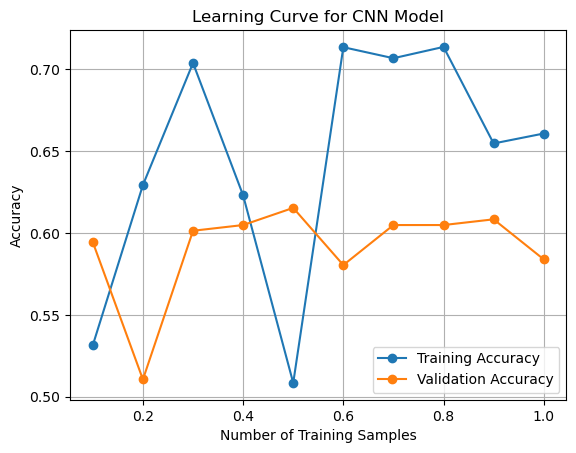

In [42]:

# Define train sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Loop through different training sizes
for train_size in train_sizes:
    subset_size = int(len(X) * train_size)
    X_subset = X[:subset_size]
    y_subset = y_encoded[:subset_size]

    cnn_model = Sequential()
    cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_subset.shape[1], 1)))
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(len(mlb.classes_), activation='softmax'))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    cnn_model.fit(X_subset, to_categorical(y_subset, num_classes=len(mlb.classes_)), epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    
    # Evaluate the CNN model
    train_loss, train_accuracy = cnn_model.evaluate(X_subset, to_categorical(y_subset, num_classes=len(mlb.classes_)), verbose=0)
    val_loss, val_accuracy = cnn_model.evaluate(X_val_cnn, to_categorical(y_val, num_classes=len(mlb.classes_)), verbose=0)
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot the learning curve
#plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(train_sizes, val_accuracies, marker='o', label='Validation Accuracy')
plt.title('Learning Curve for CNN Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## xgboost

Mean Cross-Validation Accuracy: 0.628739553129797


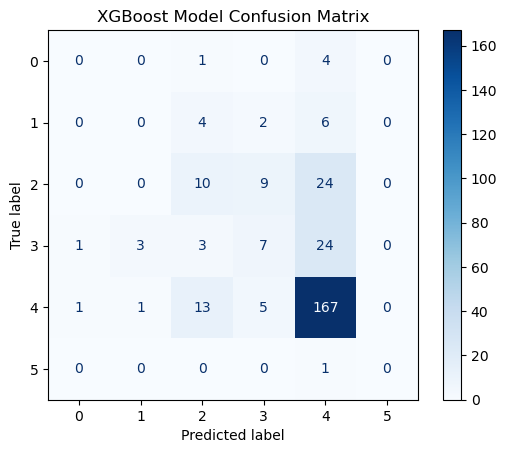

In [43]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt

# Define the category mapping
category_mapping = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)': 'Combined Disorder Category',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Substance Use Disorder': 'Substance Use Disorder',
    'Stress Response Syndromes': 'Stress Response Syndromes',
    'Attention Deficit Hyperactivity Disorder': 'ADHD',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety',
     'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder': 'Combined Disorder Category',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder':'Combined Disorder Category',
    
    # Add other mappings as needed
}

# Preprocess the target variable
y = dataf['yes_diagnosis_professional']
y_mapped = [category_mapping[label] if label in category_mapping else 'Other' for label in y]
y_split = [label.split('|') if pd.notna(label) else [] for label in y_mapped]

mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_split)

# Create a new DataFrame for pre-processing
data_selected_filled = dataf[['age', 'gender', 'company_employee_total', 'tech_company', 'tech_IT_role',
                              'mentalhealth_coverage', 'mentalhealth_coverage_awareness',
                              'mentalhealth_resources_provided', 'previous_mentalhealth_benefits',
                              'previous_mentalhealth_benefits_awareness', 'mentalhealth_seriousness_employer',
                              'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                               'country','work_position']].copy()

# Define the columns that need imputation
numeric_columns = ['age', 'company_employee_total']
categorical_columns = ['gender', 'tech_IT_role', 'mentalhealth_coverage',
                       'mentalhealth_coverage_awareness', 'mentalhealth_resources_provided',
                       'previous_mentalhealth_benefits', 'previous_mentalhealth_benefits_awareness',
                       'mentalhealth_seriousness_employer', 'mentalhealth_bad_response', 'work_remote','mentalhealth_family_history','mentalhealth_disorder_past',
                        'country','work_position']

# Apply imputation to numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data_selected_filled[numeric_columns] = numeric_imputer.fit_transform(data_selected_filled[numeric_columns])

# Apply imputation to categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_selected_filled[categorical_columns] = categorical_imputer.fit_transform(data_selected_filled[categorical_columns])

# Apply one-hot encoding to categorical columns
onehot_encoder = OneHotEncoder()
encoded_categorical = onehot_encoder.fit_transform(data_selected_filled[categorical_columns]).toarray()

# Combine numeric and encoded categorical features
X = np.concatenate((data_selected_filled[numeric_columns], encoded_categorical), axis=1)

# Convert y to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_mapped)

# Initialize StratifiedKFold for cross-validation
n_splits = 5  # You can change the number of splits as needed
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy scores
xgb_accuracies = []

# Perform cross-validation
for train_index, val_index in stratified_kfold.split(X, y_encoded):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]

    # Train the XGBoost model
    xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)
    xgb_model.fit(X_train, y_train)

    # Predict using the XGBoost model
    y_pred_xgb = xgb_model.predict(X_val)

    # Evaluate the XGBoost model
    accuracy = accuracy_score(y_pred_xgb, y_val)
    xgb_accuracies.append(accuracy)
    
# Calculate and print mean accuracy across cross-validation folds
mean_accuracy = np.mean(xgb_accuracies)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

# Plot the confusion matrix for the XGBoost model
plot_confusion_matrix(xgb_model, X_val, y_val, cmap=plt.cm.Blues)
plt.title("XGBoost Model Confusion Matrix")
plt.show()


In [45]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate weighted precision, recall, and F1 scores
weighted_precision, weighted_recall, weighted_f1, _ = precision_recall_fscore_support(y_val, y_pred_xgb, average='weighted')

print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)
print("Weighted F1 Score:", weighted_f1)


Weighted Precision: 0.5720895142043475
Weighted Recall: 0.6433566433566433
Weighted F1 Score: 0.5999054451402326


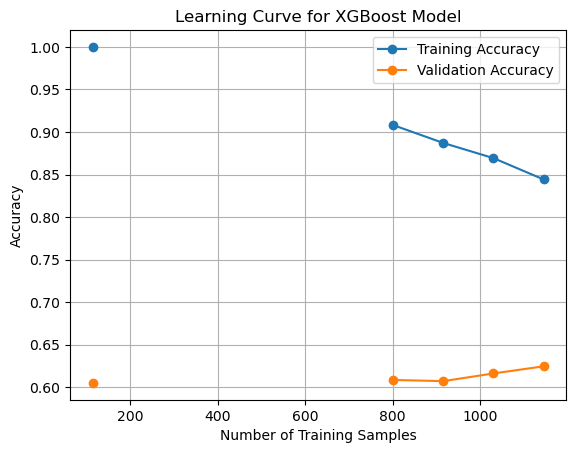

In [44]:
from sklearn.model_selection import learning_curve

# Define a function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1)

    #plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), marker='o', label='Training Accuracy')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), marker='o', label='Validation Accuracy')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.1, random_state=42)

# Define the training sizes for the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curve for the XGBoost model
plot_learning_curve(xgb_model, 'Learning Curve for XGBoost Model', X, y_encoded, cv=stratified_kfold, train_sizes=train_sizes)


## Accuracy Graph

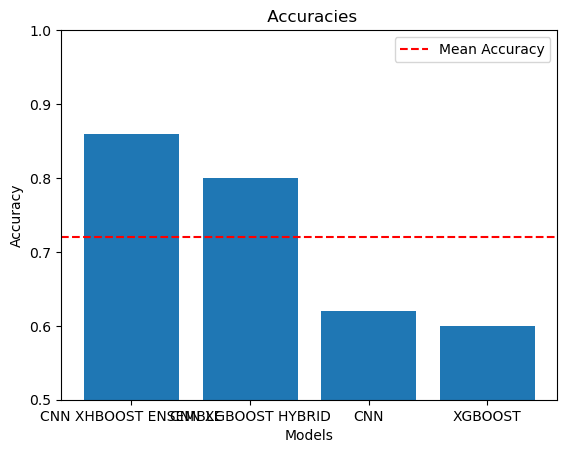

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# List of accuracies
accuracies = [0.86, 0.80, 0.62, 0.60]

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)

# Create a bar plot
plt.bar(range(len(accuracies)), accuracies, tick_label=["CNN XHBOOST ENSEMBLE", "CNN XGBOOST HYBRID", "CNN", "XGBOOST"])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title(" Accuracies")
plt.ylim(0.5, 1.0)  # Adjust ylim based on your accuracy range
plt.axhline(y=mean_accuracy, color='r', linestyle='dashed', label="Mean Accuracy")
plt.legend()
plt.show()



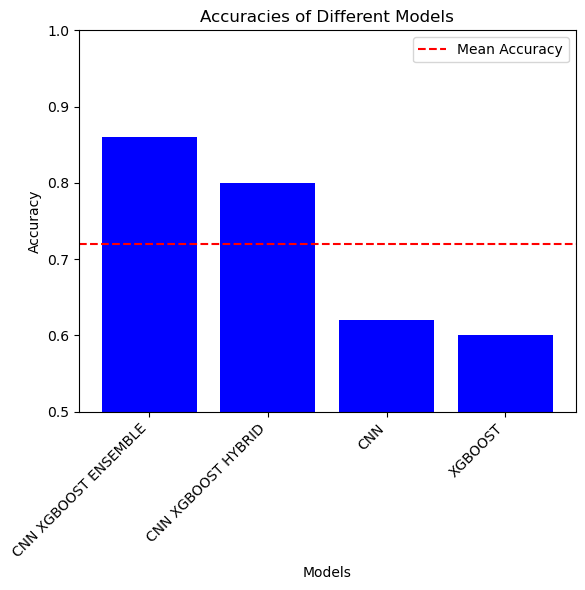

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# List of model names and accuracies
model_names = ["CNN XGBOOST ENSEMBLE", "CNN XGBOOST HYBRID", "CNN", "XGBOOST"]
accuracies = [0.86, 0.80, 0.62, 0.60]

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)

# Create a bar plot
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.bar(model_names, accuracies, color='blue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracies of Different Models")
plt.ylim(0.5, 1.0)  # Adjust ylim based on your accuracy range
plt.axhline(y=mean_accuracy, color='r', linestyle='dashed', label="Mean Accuracy")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Ensure proper spacing
plt.show()
